In [1]:
!pip install gensim scikit-learn matplotlib
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 48.1 MB/s eta 0:00:00


In [2]:
nltk.download('punkt')
nltk.download('punkt_tab') # Added to download the missing resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
corpus = [
    "Students learn natural language processing in university",
    "Word embeddings help machines understand meaning",
    "Deep learning models are used in NLP applications",
    "Word2Vec represents words as numerical vectors"
]

In [15]:
# Tokenize sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print(tokenized_corpus)

[['students', 'learn', 'natural', 'language', 'processing', 'in', 'university'], ['word', 'embeddings', 'help', 'machines', 'understand', 'meaning'], ['deep', 'learning', 'models', 'are', 'used', 'in', 'nlp', 'applications'], ['word2vec', 'represents', 'words', 'as', 'numerical', 'vectors']]


In [16]:
# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

In [17]:
# Save the model
model.save("word2vec.model")

In [18]:
model = Word2Vec.load("word2vec.model")

In [19]:
# Get vectors for a subset of words
words = list(model.wv.index_to_key)[:10]  # Select the first 10 words
print(words)
word_vectors = [model.wv[word] for word in words]
print(word_vectors)

['in', 'vectors', 'numerical', 'as', 'words', 'represents', 'word2vec', 'applications', 'nlp', 'used']
[array([-5.3776440e-04,  2.3847612e-04,  5.1040817e-03,  9.0073412e-03,
       -9.3053309e-03, -7.1183955e-03,  6.4570373e-03,  8.9725684e-03,
       -5.0152480e-03, -3.7649495e-03,  7.3799533e-03, -1.5329889e-03,
       -4.5388611e-03,  6.5529095e-03, -4.8586158e-03, -1.8136466e-03,
        2.8804634e-03,  9.9133258e-04, -8.2842493e-03, -9.4508110e-03,
        7.3143058e-03,  5.0713615e-03,  6.7592682e-03,  7.6286797e-04,
        6.3503752e-03, -3.4020152e-03, -9.4867079e-04,  5.7675499e-03,
       -7.5195353e-03, -3.9354824e-03, -7.5093461e-03, -9.2928251e-04,
        9.5389066e-03, -7.3220413e-03, -2.3329190e-03, -1.9414629e-03,
        8.0779931e-03, -5.9293276e-03,  4.4503675e-05, -4.7527347e-03,
       -9.6027227e-03,  5.0073685e-03, -8.7568499e-03, -4.3924171e-03,
       -3.5306639e-05, -2.9888647e-04, -7.6624174e-03,  9.6143838e-03,
        4.9830205e-03,  9.2333145e-03, -8.15

In [20]:

from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

In [21]:
import matplotlib.pyplot as plt

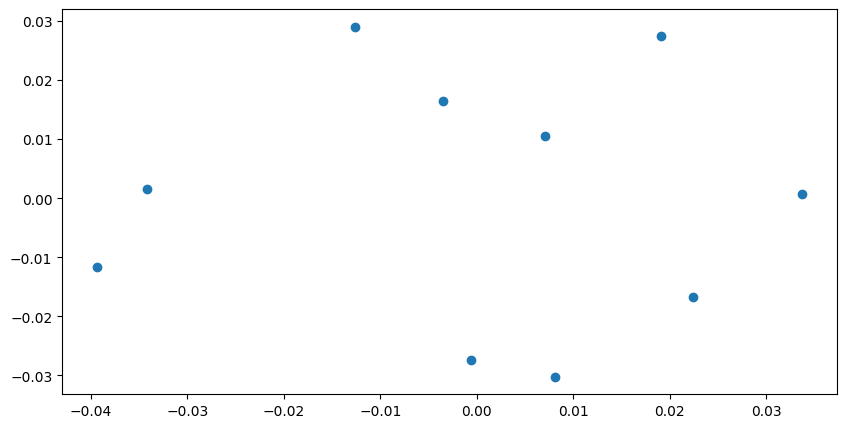

In [22]:
# Plot the words in 2D space
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

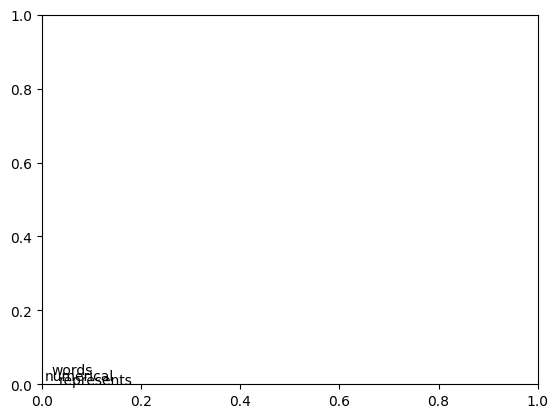

In [23]:
# Annotate the points with the words
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))

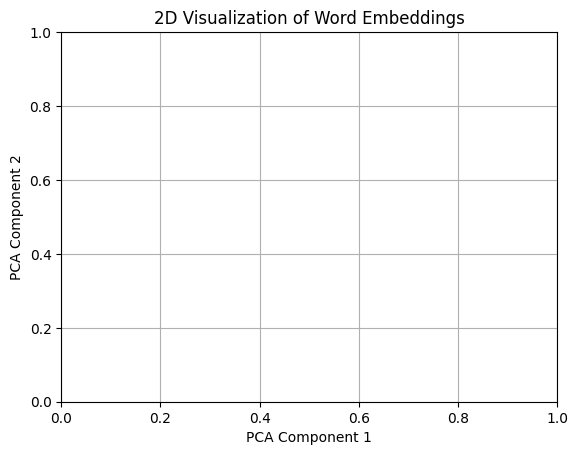

In [24]:

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()